<a href="https://colab.research.google.com/github/Diveesha909/Creatyourcontent/blob/main/EDA_influencer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace '/path/to/your/downloaded/influencers.txt' with the actual path to your file
try:
    influencers_df = pd.read_csv("/content/influencers.txt", sep='\t', skiprows=[1])
    print("Influencers data loaded successfully:")
    display(influencers_df.head())
except FileNotFoundError:
    print("Error: influencers.txt not found. Please check the path to the downloaded file.")
except Exception as e:
    print(f"An error occurred while loading influencers.txt: {e}")

Influencers data loaded successfully:


,Username,Category,#Followers,#Followees,#Posts
0,makeupbynvs,beauty,1432,1089,363
1,jaquelinevandoski,beauty,137600,548,569
2,anisaartistry,beauty,64644,289,391
3,rubina_muartistry,beauty,496406,742,887
4,beautyxabbi,beauty,2050,1423,751


In [ ]:
influencers_df.describe()

,#Followers,#Followees,#Posts
count,3.393500e+04,33935.000000,33935.000000
mean,1.403299e+05,1531.588242,1487.183409
std,1.245163e+06,2274.896034,2187.174919
min,1.000000e+03,0.000000,100.000000
25%,4.951500e+03,557.000000,538.000000
50%,1.612500e+04,974.000000,937.000000
75%,5.356550e+04,1828.000000,1732.000000
max,9.647601e+07,304758.000000,127520.000000


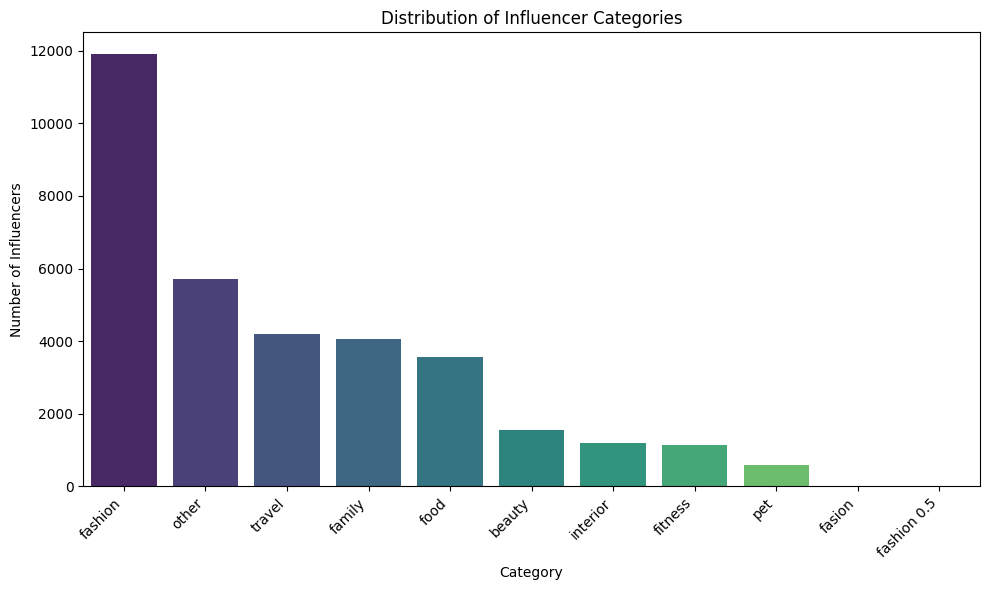

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category
category_counts = influencers_df['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', hue=category_counts.index, legend=False)
plt.title('Distribution of Influencer Categories')
plt.xlabel('Category')
plt.ylabel('Number of Influencers')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

With the eabove bar chart, we can make the few observations:
1. 'fashion' category has the most number of influencers; it has almost double the number of influencers compared to the next most popular catrgory - 'other'
2. 'fasion' and 'fashion 0.5' have one or no entries, and seem likely as a result of a typo. We can remove the data entries with this category.

In [ ]:
# Remove rows with 'fasion' and 'fashion 0.5' categories
influencers_df_cleaned = influencers_df[~influencers_df['Category'].isin(['fasion', 'fashion 0.5'])].copy()

# You can also check the category counts in the cleaned DataFrame
print("\nCategory counts in cleaned DataFrame:")
display(influencers_df_cleaned['Category'].value_counts())


Category counts in cleaned DataFrame:


,count
Category,
fashion,11911
other,5720
travel,4210
family,4070
food,3565
beauty,1542
interior,1195
fitness,1133
pet,587


In [6]:
from google.colab import drive
import os
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/Post_metadata"
zo1_files = [f for f in os.listdir(folder_path) if f.endswith('.zo1')]
print(zo1_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[]


In [14]:
folder_path = "/content/drive/My Drive/Post_metadata"
files = os.listdir(folder_path)
for filename in files:
    filepath = os.path.join(folder_path, filename)
    print(filepath)

/content/drive/My Drive/Post_metadata/posts_info.zip
/content/drive/My Drive/Post_metadata/posts_info.z18
/content/drive/My Drive/Post_metadata/posts_info.z17
/content/drive/My Drive/Post_metadata/posts_info.z16
/content/drive/My Drive/Post_metadata/posts_info.z15
/content/drive/My Drive/Post_metadata/posts_info.z14
/content/drive/My Drive/Post_metadata/posts_info.z13
/content/drive/My Drive/Post_metadata/posts_info.z12
/content/drive/My Drive/Post_metadata/posts_info.z11
/content/drive/My Drive/Post_metadata/posts_info.z10
/content/drive/My Drive/Post_metadata/posts_info.z09
/content/drive/My Drive/Post_metadata/posts_info.z08
/content/drive/My Drive/Post_metadata/posts_info.z07
/content/drive/My Drive/Post_metadata/posts_info.z06
/content/drive/My Drive/Post_metadata/posts_info.z05
/content/drive/My Drive/Post_metadata/posts_info.z04
/content/drive/My Drive/Post_metadata/posts_info.z03
/content/drive/My Drive/Post_metadata/posts_info.z02
/content/drive/My Drive/Post_metadata/posts_in

In [ ]:
import os

for filename in files:
    filepath = os.path.join(folder_path, filename)

    with open(filepath, 'rb') as file:
        content = file.read()

        try:
            # Try decoding with UTF-8
            text = content.decode('utf-8')
        except UnicodeDecodeError:
            try:
                # If UTF-8 fails, try Latin-1
                text = content.decode('latin-1')
            except UnicodeDecodeError:
                print(f"--- {filename} ---")
                print("Couldn't decode with UTF-8 or Latin-1. Might be a binary file.")
                print("\n" + "-"*80 + "\n")
                continue  # Skip to next file

        print(f"--- {filename} ---")
        print(text[:500])  # Show first 500 characters
        print("\n" + "-"*80 + "\n")


In [16]:
import shutil
import os

drive_path = "/content/drive/My Drive/Post_metadata"
local_path = "/content/posts_zip"
os.makedirs(local_path, exist_ok=True)

for i in range(1, 19):  # z01 to z18
    src = os.path.join(drive_path, f"posts_info.z{str(i).zfill(2)}")
    dst = os.path.join(local_path, f"posts_info.z{str(i).zfill(2)}")
    shutil.copy(src, dst)

# Copy the .zip file (last part of split archive)
shutil.copy(os.path.join(drive_path, "posts_info.zip"), os.path.join(local_path, "posts_info.zip"))


'/content/posts_zip/posts_info.zip'

In [17]:
!unzip /content/posts_zip/posts_info.zip -d /content/unzipped_posts


Streaming output truncated to the last 5000 lines.
file #2752:  bad zipfile offset (local header sig):  11055589
file #2753:  bad zipfile offset (local header sig):  11060567
file #2754:  bad zipfile offset (local header sig):  11062274
file #2755:  bad zipfile offset (local header sig):  11064771
file #2756:  bad zipfile offset (local header sig):  11068682
file #2757:  bad zipfile offset (local header sig):  11072134
file #2758:  bad zipfile offset (local header sig):  11076790
file #2759:  bad zipfile offset (local header sig):  11078970
file #2760:  bad zipfile offset (local header sig):  11080842
file #2761:  bad zipfile offset (local header sig):  11084273
file #2762:  bad zipfile offset (local header sig):  11087280
file #2763:  bad zipfile offset (local header sig):  11090125
file #2764:  bad zipfile offset (local header sig):  11093539
file #2765:  bad zipfile offset (local header sig):  11098025
file #2766:  bad zipfile offset (local header sig):  11102786
file #2767:  bad zi

In [20]:
file_path = "/content/unzipped_posts/info/fashionyoureallywant-1757991212914245413.info"

with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 500:  # just print first 20 lines
            break

PKPK
     .LP              info/UT	 ̒C^NV^ux         PK    ZDP^]  )  (  info/beckilw_sw-1684125244807239621.infoUT	 :T9^:T9^ux         Zks6+a?&ЙȎ$vǶIPD2z8e[崩$ 	suZHlhg3IԔA4@1P8sWa22TC*#z\V-jS/2=/ZiQպ_|-yw2jfL Q*	3"~ox[sF/0VdP%s%
8cqgB%Č!ȠX(Կ~i14I~0Mz s
&ҏ?{_e0e/N(b
3t(䉯v0v9矵tk퀘&A*_sŢa"
9;lH#]?'-6I0
HtV]8F2թ-ixNSNSйNhQMjƝVAS0KålLUC<^mCn,afV9.mf&QД_]PłD		M*.$	Tح[a ?|0#>?f* N!u$ήtaL柘2M%ۧTK"BtkhqytKd ͘D>JV
lAfA0L& 7q_i{h٦miȂ}0uq<Wm'γ5P|l-xu߸	gL#_/FN/c=@9^Ơs`-X^wP0Nl8ݰRfV5͇Nq=o٢[T^Zx%WZ{Aq5	u׼ߛXAie^ԮUKD'-F;׭9fJQ,H^1H8S; /J22&4`ا2ԌKÕ
`fx>ͰIMqc0`A}}X*<4\:_p֬ $Zoo?ט;?I?RRA,f'ω/*1rEǖ歹S
,WPµqDEiU4^e޿&U;k+2%Hz6qEcPM!qPz=IkJ`4><(g:2 0ЁiK-0L!}`" ;+*8(+$% Q:!(@pJBg@#9NĦ`3˛h&ml 	 (Ĕ#=2f8
Ad|cT>X.fapc01d>Y i7#
)  
 "+°'1U<-.yy&? `+1
tⱁY={YS t(TV&K:mah`!̓
/LIk/eXi k ^fzQ^p
]Sy5ۛn
[{q:is7ndPy6auU
Q?LNq